In [1]:
#! /usr/bin/python2
import pandas as pd #used for DATAFrames and DataFrames can hold different types data of multidimensional arrays. 
import numpy as np#Numpy provides robust data structures for efficient computation of multi-dimensional arrays & matrices.
import pickle
import sklearn.ensemble as ske
from sklearn.model_selection import train_test_split
from sklearn import  tree, linear_model
from sklearn.feature_selection import SelectFromModel
import joblib
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('data.csv', sep='|') #generate df as data
X = data.drop(['Name', 'md5', 'legitimate'], axis=1).values #now droping some coloumns as axis 1(mean coloumn) and will show the values in the rows
y = data['legitimate'].values #values of legitimate data

print('Researching important feature based on %i total features\n' % X.shape[1])

Researching important feature based on 54 total features



In [3]:

# Feature selection using Trees Classifier
fsel = ske.ExtraTreesClassifier().fit(X, y)
model = SelectFromModel(fsel, prefit=True)
X_new = model.transform(X)#now features are only 9 :)
nb_features = X_new.shape[1]#will save value 13 as shape is (138047, 13) :}
print(nb_features)

15


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y ,test_size=0.2)#now converting in training and testing data in 20% range hahhahaha ! as total x is 138047 and testing is 138047*0.2=27610 :)
features = []

In [5]:
indices = np.argsort(fsel.feature_importances_)[::-1][:nb_features]
for f in range(nb_features):
    print("%d. feature %s (%f)" % (f + 1, data.columns[2+indices[f]], fsel.feature_importances_[indices[f]]))

# mean adding to the empty 'features' array the 'important features'
for f in sorted(np.argsort(fsel.feature_importances_)[::-1][:nb_features]):#[::-1] mean start with last towards first 
    features.append(data.columns[2+f])

1. feature DllCharacteristics (0.148140)
2. feature Machine (0.109527)
3. feature Characteristics (0.082007)
4. feature ImageBase (0.065070)
5. feature Subsystem (0.063332)
6. feature SectionsMaxEntropy (0.060616)
7. feature VersionInformationSize (0.060592)
8. feature SizeOfOptionalHeader (0.049603)
9. feature MajorSubsystemVersion (0.046672)
10. feature ResourcesMaxEntropy (0.045906)
11. feature MajorOperatingSystemVersion (0.028661)
12. feature SizeOfStackReserve (0.026007)
13. feature ResourcesMinEntropy (0.022544)
14. feature SectionsMinEntropy (0.019332)
15. feature SectionsMeanEntropy (0.018981)


In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

In [6]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(None,13)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [7]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              

In [ ]:
hist_3 = model_3.fit(X_train, y_train,
          batch_size=32, epochs=100,
          validation_data=(X_test, y_test))

Epoch 1/100
3452/3452 [==============================] - 127s 37ms/step - loss: 46765470865.5172 - accuracy: 0.8900 - val_loss: 26969688064.0000 - val_accuracy: 0.9675
Epoch 2/100
3452/3452 [==============================] - 125s 36ms/step - loss: 285687665983.9814 - accuracy: 0.9345 - val_loss: 60446306304.0000 - val_accuracy: 0.9661
Epoch 3/100
3452/3452 [==============================] - 128s 37ms/step - loss: 240738895153.9308 - accuracy: 0.9436 - val_loss: 2658971904.0000 - val_accuracy: 0.9395
Epoch 4/100
3452/3452 [==============================] - 128s 37ms/step - loss: 4207696324.4422 - accuracy: 0.8200 - val_loss: 932.0375 - val_accuracy: 0.7014
Epoch 5/100
3452/3452 [==============================] - 128s 37ms/step - loss: 36789579.0993 - accuracy: 0.7146 - val_loss: 895.0899 - val_accuracy: 0.7014
Epoch 6/100
3452/3452 [==============================] - 128s 37ms/step - loss: 441756.6262 - accuracy: 0.7040 - val_loss: 771.1481 - val_accuracy: 0.7014
Epoch 7/100
3452/3452 [=

In [6]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X_train, y_train, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

Automatically created module for IPython interactive environment


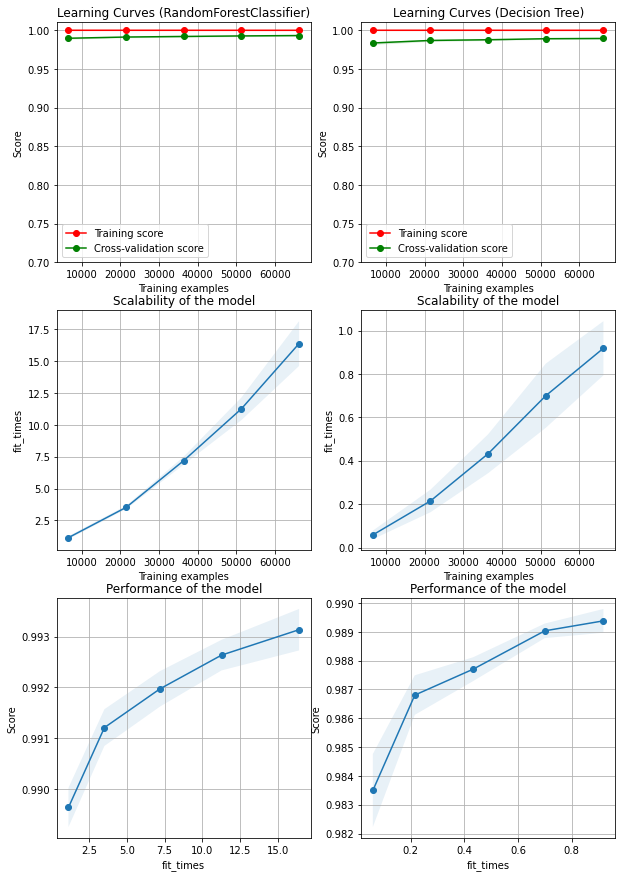

In [7]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

title = "Learning Curves (RandomForestClassifier)"
# Cross validation with 10 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.4, random_state=0)

estimator = RandomForestClassifier()
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 0], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (Decision Tree)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.4, random_state=0)
estimator = tree.DecisionTreeClassifier()
plot_learning_curve(estimator, title, X_train, y_train, axes=axes[:, 1], ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

In [8]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


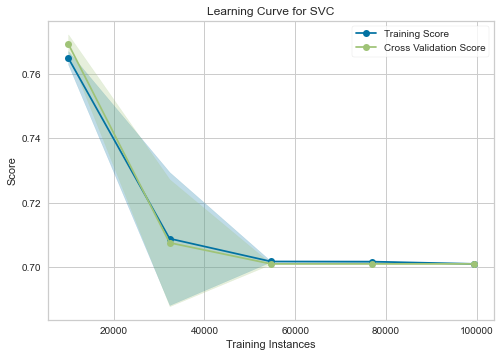

LearningCurve(ax=<AxesSubplot:title={'center':'Learning Curve for SVC'}, xlabel='Training Instances', ylabel='Score'>,
              cv=10, estimator=SVC(), scoring='accuracy')


In [9]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from yellowbrick.model_selection import learning_curve


svm = SVC(C=1.0, kernel='rbf', gamma='scale')
print(learning_curve(svm, X_train, y_train, cv=10, scoring='accuracy'))

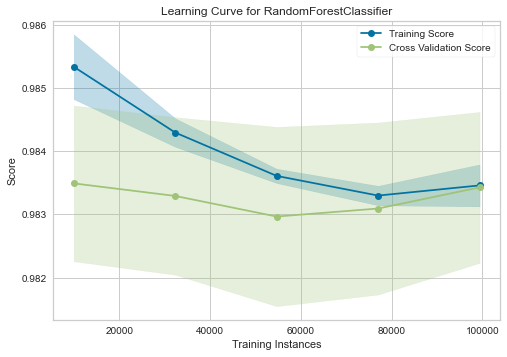

LearningCurve(ax=<AxesSubplot:title={'center':'Learning Curve for RandomForestClassifier'}, xlabel='Training Instances', ylabel='Score'>,
              cv=10,
              estimator=RandomForestClassifier(max_depth=3, random_state=0),
              scoring='accuracy')


In [10]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
print(learning_curve(rfc, X_train, y_train, cv=10, scoring='accuracy'))

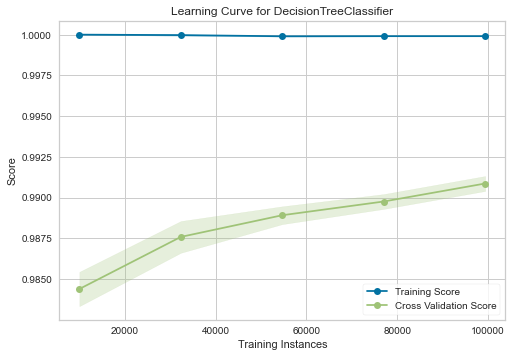

LearningCurve(ax=<AxesSubplot:title={'center':'Learning Curve for DecisionTreeClassifier'}, xlabel='Training Instances', ylabel='Score'>,
              cv=10, estimator=DecisionTreeClassifier(), scoring='accuracy')


In [11]:
from sklearn import tree
rfc = tree.DecisionTreeClassifier()
print(learning_curve(rfc, X_train, y_train, cv=10, scoring='accuracy'))

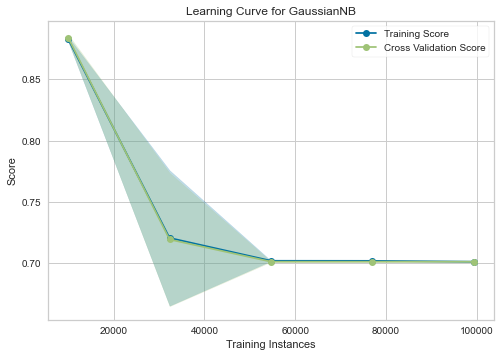

LearningCurve(ax=<AxesSubplot:title={'center':'Learning Curve for GaussianNB'}, xlabel='Training Instances', ylabel='Score'>,
              cv=10, estimator=GaussianNB(), scoring='accuracy')


In [12]:
from sklearn.naive_bayes import GaussianNB
rfc = GaussianNB()
print(learning_curve(rfc, X_train, y_train, cv=10, scoring='accuracy'))

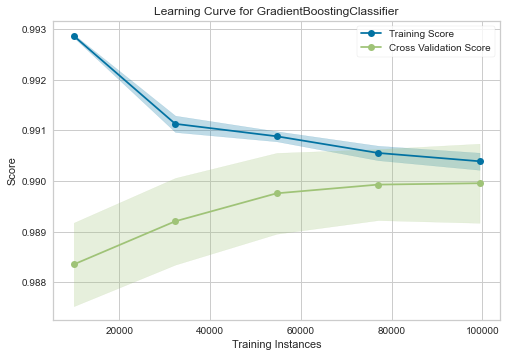

LearningCurve(ax=<AxesSubplot:title={'center':'Learning Curve for GradientBoostingClassifier'}, xlabel='Training Instances', ylabel='Score'>,
              cv=10, estimator=GradientBoostingClassifier(),
              scoring='accuracy')


In [13]:
import sklearn.ensemble as ske
rfc = ske.GradientBoostingClassifier()
print(learning_curve(rfc, X_train, y_train, cv=10, scoring='accuracy'))

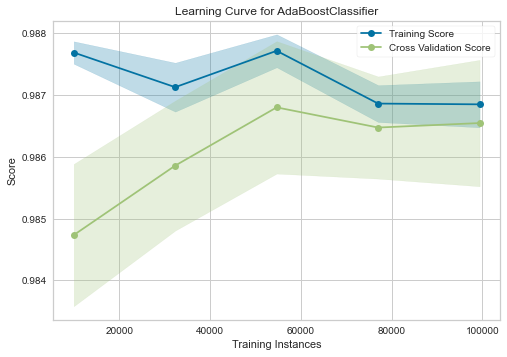

LearningCurve(ax=<AxesSubplot:title={'center':'Learning Curve for AdaBoostClassifier'}, xlabel='Training Instances', ylabel='Score'>,
              cv=10, estimator=AdaBoostClassifier(n_estimators=100),
              scoring='accuracy')


In [14]:
import sklearn.ensemble as ske
rfc = ske.AdaBoostClassifier(n_estimators=100)
print(learning_curve(rfc, X_train, y_train, cv=10, scoring='accuracy'))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


<AxesSubplot:>

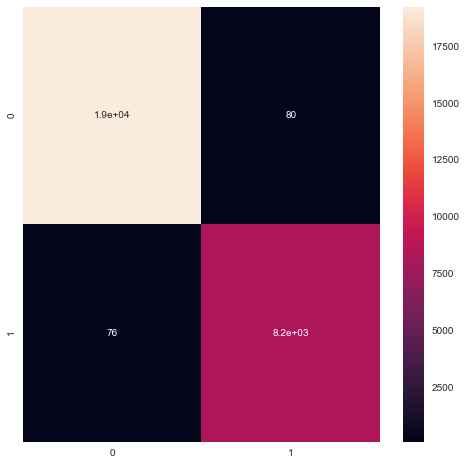

In [18]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(verbose =1, random_state =21,n_jobs=-1)
clf.fit(X_train, y_train) 
predicted = clf.predict(X_test)
matrix = confusion_matrix(y_test, predicted)
df_cm = pd.DataFrame(matrix)
plt.figure(figsize = (8,8))
sn.heatmap(df_cm, annot=True)

<AxesSubplot:>

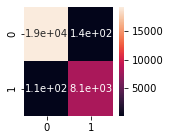

In [7]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train) 
predicted = clf.predict(X_test)
matrix = confusion_matrix(y_test, predicted)
df_cm = pd.DataFrame(matrix)
plt.figure(figsize = (2,2))
sn.heatmap(df_cm, annot=True)

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train) 
predicted = clf.predict(X_test)
matrix = confusion_matrix(y_test, predicted)
df_cm = pd.DataFrame(matrix)
plt.figure(figsize = (4,4))
sn.heatmap(df_cm, annot=True)